#### **Análise Exploratória**

### *Indice*

- Período de Análise
- Quantidade linhas e colunas
- Período de Análise
- Informações gerais das colunas
- Amostra de Dados
- Informações Estatísticas
- Cotação Mês

---

In [119]:
import pandas as pd

df_bolsa = pd.read_csv('src/bolsa.csv', delimiter=';')

In [200]:
# Amostra de Dados

df_bolsa.head(5)

,data_hora,cotacao,minima,maxima,variaçao,variaçao_percentual,volume,mes,date
0,25/09/2020,"96.999,38","95.631,74","97.011,80","-12,69","-0,01",7.351.088,setembro,2020-09-25
1,24/09/2020,"97.012,07","95.652,56","97.954,63","1.277,25","1,33",9.331.043,setembro,2020-09-24
2,23/09/2020,"95.734,82","95.728,13","97.388,94","-1.558,72","-1,6",8.830.686,setembro,2020-09-23
3,22/09/2020,"97.293,54","96.390,28","97.684,16","302,82","0,31",7.281.307,setembro,2020-09-22
4,21/09/2020,"96.990,72","95.820,34","98.282,75","-1.298,99","-1,32",9.738.004,setembro,2020-09-21


In [121]:
# Quantidade de Linhas e Colunas

df_shape = pd.DataFrame(columns=['linhas', 'colunas'], data=[[df_bolsa.shape[0], df_bolsa.shape[1]]])
df_shape

,linhas,colunas
0,127,7


In [122]:
# Período de Análise

dt_inicio = pd.to_datetime(df_bolsa['data_hora'], dayfirst=True).min()
dt_fim = pd.to_datetime(df_bolsa['data_hora'], dayfirst=True).max()

df_data = pd.DataFrame(columns=['Data Inicio', 'Data Final'], data=[[dt_inicio, dt_fim]])
df_data

,Data Inicio,Data Final
0,2020-03-27,2020-09-25


In [123]:
# Informações gerais das colunas

lst_data = []

for column in df_bolsa.columns:
    lst_series = []
    lst_series.append(column)
    lst_series.append(df_bolsa[column].count())
    lst_series.append(df_bolsa[column].isnull().sum())
    lst_series.append(df_bolsa[column].dtype)
    lst_data.append(lst_series)

df_data = pd.DataFrame(columns=['Nome Coluna', 'Valores ñ Nulos', 'Valores Nulos', 'Coluna Tipo'], data=lst_data)
df_data

,Nome Coluna,Valores ñ Nulos,Valores Nulos,Coluna Tipo
0,data_hora,127,0,object
1,cotacao,127,0,object
2,minima,127,0,object
3,maxima,127,0,object
4,variaçao,127,0,object
5,variaçao_percentual,127,0,object
6,volume,127,0,object


In [201]:
# Informações Estatísticas

df_tmp_bolsa = df_bolsa.replace(to_replace={'\.': '', '\,': '.'}, regex=True)

convert_dict = {'cotacao': float, 'minima': float, 'maxima': float, 'variaçao': float, 'variaçao_percentual': float, 'volume': int}
df_con_bolsa = df_tmp_bolsa.astype(convert_dict)

df_desc_bolsa = df_con_bolsa.describe().round(2)
df_desc_bolsa

,cotacao,minima,maxima,variaçao,variaçao_percentual,volume
count,127.00,127.00,127.00,127.00,127.00,127.00
mean,92322.26,91077.13,93439.74,151.69,0.19,9992319.51
std,10262.38,10441.27,10007.62,1644.89,1.92,2185588.64
min,69537.56,67802.47,72241.09,-4342.69,-5.51,0.00
25%,80968.32,79580.90,82054.02,-1190.53,-1.23,8989904.00
50%,96203.20,95343.52,97388.94,23.39,0.02,9861239.00
75%,100787.54,99706.91,101770.72,1305.32,1.50,11120248.50
max,105605.17,104111.75,105703.62,4535.42,6.52,16550910.00


In [125]:
# Maior Variação
display(df_con_bolsa[df_con_bolsa['variaçao'] == df_con_bolsa['variaçao'].max()])

# Menor Variação
display(df_con_bolsa[df_con_bolsa['variaçao'] == df_con_bolsa['variaçao'].min()])

# Maior Cotação
display(df_con_bolsa[df_con_bolsa['cotacao'] == df_con_bolsa['cotacao'].max()])

# Menor Cotação
display(df_con_bolsa[df_con_bolsa['cotacao'] == df_con_bolsa['cotacao'].min()])

,data_hora,cotacao,minima,maxima,variaçao,variaçao_percentual,volume
120,06/04/2020,74072.98,69555.61,75259.7,4535.42,6.52,9685375


,data_hora,cotacao,minima,maxima,variaçao,variaçao_percentual,volume
108,24/04/2020,75330.61,72040.82,79666.62,-4342.69,-5.45,16529162


,data_hora,cotacao,minima,maxima,variaçao,variaçao_percentual,volume
41,29/07/2020,105605.17,104111.75,105703.62,1496.1,1.44,9238287


,data_hora,cotacao,minima,maxima,variaçao,variaçao_percentual,volume
121,03/04/2020,69537.56,67802.47,72241.09,-2715.9,-3.76,10411316


In [205]:
# Cotação Mês

import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8') 

df_con_bolsa['date'] = pd.to_datetime(df_con_bolsa['data_hora'], dayfirst=True)
df_con_bolsa['mes'] = df_con_bolsa['date'].dt.strftime('%B')
df_group_mes = df_con_bolsa.groupby(['mes'])[['date', 'cotacao']].max().reset_index().sort_values(by='date')
df_group_mes


,mes,date,cotacao
5,março,2020-03-31,74639.48
0,abril,2020-04-30,83170.80
4,maio,2020-05-29,87946.25
3,junho,2020-06-30,97644.67
2,julho,2020-07-31,105605.17
1,agosto,2020-08-31,104125.64
6,setembro,2020-09-25,102167.65


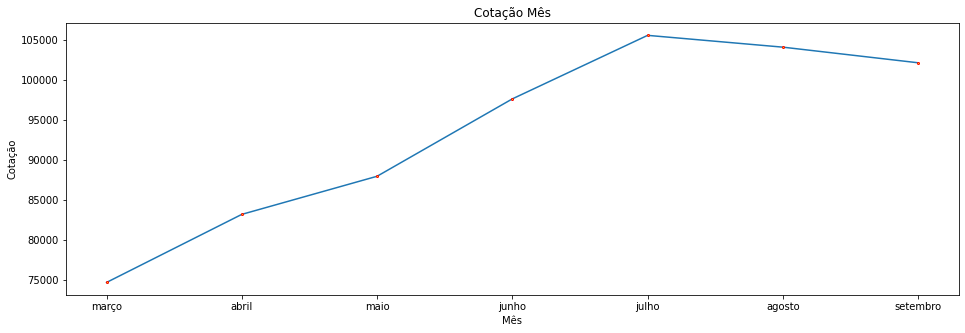

In [199]:
import matplotlib.pyplot as plt

fig = plt.subplots(figsize=(16, 5))
plt.plot(df_group_mes['mes'], df_group_mes['cotacao'], marker='.', markerfacecolor='yellow', markeredgecolor='red', markersize=4)

plt.xlabel("Mês")
plt.ylabel("Cotação")
plt.title('Cotação Mês')
plt.show()